# Module 2, Lecture 4: Type Abstruction

### Plotting Setup

This section imports the necessary libraries (`matplotlib`, `datetime`, `relativedelta`, `random`, `sys`) and configures **plot aesthetics** using `plt.rcParams`.  

- **Line width:** 4  
- **Font sizes:** titles (12), axis labels (12), x-ticks (10), y-ticks (12)  
- **Tick sizes:** x-axis (7), y-axis (7)  
- **Legend:** one point per entry, font size (8)  
- **Markers:** size 6  

These settings ensure that all plots in the lecture are clear, consistent, and easy to read.  


In [1]:
import matplotlib.pyplot as plt
from datetime import date
from dateutil.relativedelta import relativedelta
import random
import sys

# set line width
plt.rcParams['lines.linewidth'] = 4
# set font size for titles
plt.rcParams['axes.titlesize'] = 12
# set font size for labels on axes
plt.rcParams['axes.labelsize'] = 12
# set size of numbers on x-axis
plt.rcParams['xtick.labelsize'] = 10
# set size of numbers on y-axis
plt.rcParams['ytick.labelsize'] = 12
# set size of ticks on x-axis
plt.rcParams['xtick.major.size'] = 7
# set size of ticks on y-axis
plt.rcParams['ytick.major.size'] = 7
# set numpoints for legend``
plt.rcParams['legend.numpoints'] = 1
# set fontsize for legend
plt.rcParams['legend.fontsize'] = 8
# set marker size
plt.rcParams['lines.markersize'] = 6

### The `Fraction` Class

This class defines an **immutable rational number** type in Python.  

- **Initialization:**  
  - Stores numerator and denominator in a list (`self.val`).  
  - Denominator must be nonzero.  

- **Custom methods:**  
  - `lt()` and `mul()`: early versions of comparison and multiplication.  
  - Replaced by Python’s **dunder methods** for operator overloading.  

- **Dunder methods:**  
  - `__lt__`: enables `<` comparisons between fractions.  
  - `__mul__`, `__truediv__`, `__add__`, `__sub__`: implement `*`, `/`, `+`, `-`.  
  - `__float__`: converts a fraction to a `float`.  
  - `__str__`: prints the fraction in **reduced form** (using GCD). 

In [ ]:
class Fraction(object):
    """
    A rational number represented as a fraction.
    Fractions are immutable.
    """
    def __init__(self, num, denom):
        """ num and denom are integers, denom != 0"""
        self.val = [num, denom]

    def lt(self, other):
        """Returns true if self < other, false otherwise"""
        return self.val[0]/self.val[1] < other.val[0]/other.val[1]
    
    def mul(self, other):
        """ Returns a new fraction representing the
            multiplication of self and other"""
        top = self.val[0]*other.val[0]
        bottom = self.val[1]*other.val[1]
        return Fraction(top, bottom)
    
    def __lt__(self, other):
        """Returns true if self < other, false otherwise"""
        return self.val[0]/self.val[1] < other.val[0]/other.val[1]
    
    def __mul__(self, other):
        """ Returns a new fraction representing the
            multiplication of self and other"""
        top = self.val[0]*other.val[0]
        bottom = self.val[1]*other.val[1]
        return Fraction(top, bottom)
    
    def __truediv__(self, other):
        """ Returns a new fraction representing dividing
            self by other"""
        top = self.val[0]*other.val[1]
        bottom = self.val[1]*other.val[0]
        return Fraction(top, bottom)
    
    def __add__(self, other):
        """ Returns a new fraction representing the
            addition of self and other"""
        top = self.val[0]*other.val[1] + other.val[0]*self.val[1]
        bottom = self.val[1]*other.val[1]
        return Fraction(top, bottom)
    
    def __sub__(self, other):
        """ Returns a new fraction representing the
            subtraction of other from self"""
        top = self.val[0]*other.val[1] - self.val[1]*other.val[0]
        bottom = self.val[1]*other.val[1]
        return Fraction(top, bottom)
    
    def __float__(self):
        return self.val[0]/self.val[1]
    
    def __str__(self):
        """Returns a string representation of the fraction
           The fraction is fully reduced."""
        def reduce(self):
            def gcd(n, d):
                while d != 0:
                    (d, n) = (n%d, d)
                return n
            greatest_common_divisor = gcd(self.val[0],self.val[1])
            top = int(self.val[0]/greatest_common_divisor)
            bottom = int(self.val[1]/greatest_common_divisor)
            return top, bottom
        top, bottom = reduce(self)
        return str(top) +'/' + str(bottom)

### Using Fractions

- `mul()` / `lt()` work, but operators (`*`, `<`) via dunder methods are cleaner.  
- Fractions handle negatives and convert to `float` with `__float__`.  
- Fractions give **exact arithmetic** (e.g., 1/10 + … + 1/10 = 1), unlike floating point (~0.9999).  



In [3]:
f1 = Fraction(1,2)
f2 = f1.mul(f1)
print(f1.lt(f2))

f1 = Fraction(1,2)
f2 = f1*f1
print(f1 < f2)

f1 = Fraction(-1,2)
f2 = Fraction(2,3)
print(f1*f2)

print(f'The floating point representation of {f2} is {float(f2)}.')

num = 0
frac = Fraction(0, 1)
for _ in range(10):
    num += 0.1
    frac += Fraction(1, 10)
print(f'num = {num}')
print(f'frac = {frac} = {float(frac)}')


False
False
-1/3
The floating point representation of 2/3 is 0.6666666666666666.
num = 0.9999999999999999
frac = 1/1 = 1.0


### `Transaction` (immutable)
- Records a single event: **'Initial loan'**, **'Payment'**, or **'Accrued interest'**.
- Stores `{date, description, amount}`; payments are negative internally.
- Key methods: `get_date()`, `get_payment_amt()` (positive for payments), `get_amount()`, `__str__()`.

### `Ledger` (mutable)
- Tracks a loan’s **history**: `transactions` and running **balances**.
- Starts with the initial loan; `add_transaction()` updates both log and balance.
- Key methods: `get_balances()`, `get_dates()`, `get_total_paid()`, `__str__()`.

### `Loan` (mutable, fixed-rate, no set schedule)
- State: `balance`, `annual_rate` (and `daily_rate`), `start_date`, `last_accrual`, and a `Ledger`.
- Actions: `accrue_interest(current_date)` and `make_payment(amount, date)`.
- Encapsulation: `_update_ledger()` is **private**; getters: `get_start_date()`, `get_balance()`, `get_annual_rate()`, `get_ledger()`.


In [5]:
class Transaction(object):
    """ An immutable type describing transactions related to loans"""
    
    def __init__(self, description, amount, date):
        """ description a string describing type of transaction. Must be one
              of 'Initial loan', 'Payment', 'Accrued interest'
            amount a number indicated value of transaction (negative for
              a Payment)
            date of type date is the date of the transaction
        """
        self.val = {'date': date, 'description': description,
                    'amount': amount}
    
    def get_date(self):
        """ returns the date of the transaction"""
        return self.val['date']
    
    def get_payment_amt(self):
        """ Returns the value of a loan payment transaction. Note this
            will be a positive number.
            For all other kinds of transactions returns 0
        """
        if self.val['description'] == 'Payment':
            return -self.val['amount']
        else:
            return 0
    
    def get_amount(self):
        """ Returns the amount of the transaction"""
        return self.val['amount']
    
    def __str__(self):
        """ returns a string describing the transaction"""
        date = self.val['date']
        description = self.val['description']
        if description == 'Payment':
            return f"{date}: Payment of ${abs(self.val['amount'])}"
        elif description == 'Accrued interest':
            return f"{date}: Accrued interest of ${self.val['amount']}"
        else:
            return f"\n\n{date}: Initial loan of ${self.val['amount']}"
            

In [6]:
class Ledger(object):
    """ A mutable type that records a sequence of transactions"""
    
    def __init__(self, title, principal, date):
        """ title a str, principal, a positive number, date a date
            creates a mutable ledger for a loan
        """
        self.title = title
        self.transactions = [Transaction('Initial loan', principal, date)]
        self.balances = [principal]
        
    def add_transaction(self, trans):
        """ adds a transaction to a ledger"""
        self.transactions.append(trans)
        self.balances.append(round(self.balances[-1] +
                                   trans.get_amount(), 2))
        
    def get_balances(self):
        """ returns a list with the the history of loan balances in the ledger"""
        return self.balances[:]
        
    def get_dates(self):
        """ returns a list with the the history of transactin dates"""
        return [t.get_date() for t in self.transactions]
    
    def get_total_paid(self):
        """ returns the sum of all loan payments recorded"""
        return sum([abs(t.get_payment_amt()) for t in self.transactions])
           
    def __str__(self):
        result = f'          Ledger for {self.title}'
        for i in range(len(self.transactions)):
            result += (f"{self.transactions[i]}, "
                       f"balance = {self.balances[i]}\n")
        return result[:-1] 

In [7]:
class Loan(object):
    """ A mutable type for a fixed rate loan with no payment schedule
        or duration. Allows payments, accrues interest, and keeps a
        ledger of transactions
    """
        
    def __init__(self, principal, annual_rate, start_date, name):
        """principal and annual_rate non-negative numbers
           start_date an object of type date, name a str
        """
        self.annual_rate = annual_rate
        self.daily_rate = annual_rate / 365
        self.balance = principal
        self.ledger = Ledger(name, principal, start_date)
        self.start_date = start_date
        self.last_accrual = start_date

    def _update_ledger(self, description, amount, date):
        """ private method for updating ledger. Should not be called from
            outside of class
        """
        self.ledger.add_transaction(Transaction(description, amount, date))

    def accrue_interest(self, current_date):
        """accrues interest between the most recent interest accrual and
           current_date
        """
        days = (current_date - self.last_accrual).days
        if days > 0:
            interest = round(self.balance * self.daily_rate * days, 2)
            self.balance += interest
            self._update_ledger('Accrued interest', interest, current_date)
            self.last_accrual = current_date

    def make_payment(self, amount, date):
        """ make a payment of amount on date """
        self.balance -= amount
        self._update_ledger('Payment', -amount, date)

    def get_start_date(self):
        return self.start_date
        
    def get_balance(self):
        return round(self.balance, 2)
    
    def get_annual_rate(self):
        return self.annual_rate

    def get_ledger(self):
        return self.ledger

### Using the `Loan` Class

- **Create loan:** `$200` principal, `24%` annual rate, start date `1776-07-04`.  
- **Accrue interest:** Adds one month of interest (by `daily_rate`).  
- **Make payment:** Subtracts `$100` and updates the ledger.  
- **Check balance:** `get_balance()` shows the remaining amount after interest and payment.  


In [8]:
# Create object of type loan with initial values
loan = Loan(principal = 200, annual_rate = 0.24,
                start_date = date(1776, 7, 4), name = 'Musket Loan')
# Mutate the loan object
loan.accrue_interest(date(1776, 8, 4))
# Mutate the loan object
loan.make_payment(100, date(1776, 8, 4))
# Extract and print information about the loan object
print(f'The remaining loan balance is ${loan.get_balance()}')

The remaining loan balance is $104.08


### Loan Payment Simulation

- **`make_payments(loan, payment_amt, payment_prob=1)`**  
  - Simulates monthly payments with probability of paying (`payment_prob`).  
  - Stops if debt grows faster than payments.  
  - Handles full or partial final payment.  

- **`simple_make_payments(loan, payment_amt)`**  
  - Deterministic version: assumes **every payment is made**.  
  - Loops until balance is fully repaid.  


In [9]:
def make_payments(loan, payment_amt, payment_prob = 1):
    """ Simulate making series of of monthly loan payments of payment_amt
           until either balance is 0 or payment would not cover monthly
           accrued interest
        Each payment is made with a probability of payment_prob.
        
        Mutates loan
    """
    payment_date = loan.get_start_date() + relativedelta(months=1)
    while loan.get_balance() > 0:
        loan.accrue_interest(payment_date)
        balance = loan.get_balance()
        if balance*(loan.get_annual_rate()/12) > payment_amt:
            return # because debt will never stop growing
        if random.random() <= payment_prob:
            if balance < payment_amt:
                loan.make_payment(balance, payment_date)
            else:
                loan.make_payment(payment_amt, payment_date)
        payment_date = payment_date + relativedelta(months=1)

In [10]:
def simple_make_payments(loan, payment_amt):
    payment_date = loan.get_start_date() + relativedelta(months=1)
    while loan.get_balance() > 0:
        loan.accrue_interest(payment_date)
        balance = loan.get_balance()
        if balance < payment_amt:
            loan.make_payment(balance, payment_date)
        else:
            loan.make_payment(payment_amt, payment_date)
        payment_date = payment_date + relativedelta(months=1)

### Very Simple Loan Test

- Creates a $200 loan at 24% annual rate.  
- Pays $40 monthly until balance is cleared.  
- Uses the ledger to report **total paid** and **elapsed days**.  


In [22]:
def very_simple_test():
    start_date = date(2025, 7, 1)
    principal = 200
    annual_rate = 0.24 # 2%/month
    title = f'Loan of ${principal} with annual rate {100*annual_rate}%'
    payment_amt = 40
    
    loan = Loan(principal = principal, annual_rate = annual_rate,
                    start_date = start_date, name = title)
    simple_make_payments(loan, payment_amt)
    ledger = loan.get_ledger()
    end_date = ledger.get_dates()[-1]
    total_paid = ledger.get_total_paid()
    elapsed_days = (end_date - start_date).days
    print(f'Total paid when monthly payment is ${payment_amt} = '
          f'${total_paid}.\nElapsed days = {elapsed_days}.')
    
very_simple_test()

Total paid when monthly payment is $40 = $213.04.
Elapsed days = 184.


### Simple Loan Test

- **`simple_test`**: Creates a $200 loan at 24% annual rate, simulates monthly payments (`payment_amt`) with optional probability of missed payments.  
  - Prints the **ledger** if `verbose=1`.  
  - Reports **total paid** and **elapsed days**.  

- **`first_test`**: Runs `simple_test` with a $40 monthly payment and prints the full ledger.  


In [18]:

def simple_test(title, payment_amt, payment_prob = 1, verbose = 0):
    """Try a simple loan"""
    start_date = date(2025, 7, 1)
    principal = 200
    annual_rate = 0.24 # 2%/month
    
    title = title + f' ${principal} with annual rate {100*annual_rate}%'
    loan = Loan(principal=principal, annual_rate=annual_rate,
                    start_date=start_date, name = title)
    make_payments(loan, payment_amt, payment_prob)
    ledger = loan.get_ledger()
    if verbose > 0:
        print(ledger)
    end_date = ledger.get_dates()[-1]
    total_paid = ledger.get_total_paid()
    elapsed_days = (end_date - start_date).days
    print(f'Total paid when monthly payment is ${payment_amt} = '
          f'${total_paid}.\nElapsed days = {elapsed_days}')

def first_test():
    """ Look at a ledger"""
    simple_test('Test 1: Loan', 40, verbose = 1)
    
first_test()

          Ledger for Test 1: Loan $200 with annual rate 24.0%

2025-07-01: Initial loan of $200, balance = 200
2025-08-01: Accrued interest of $4.08, balance = 204.08
2025-08-01: Payment of $40, balance = 164.08
2025-09-01: Accrued interest of $3.34, balance = 167.42
2025-09-01: Payment of $40, balance = 127.42
2025-10-01: Accrued interest of $2.51, balance = 129.93
2025-10-01: Payment of $40, balance = 89.93
2025-11-01: Accrued interest of $1.83, balance = 91.76
2025-11-01: Payment of $40, balance = 51.76
2025-12-01: Accrued interest of $1.02, balance = 52.78
2025-12-01: Payment of $40, balance = 12.78
2026-01-01: Accrued interest of $0.26, balance = 13.04
2026-01-01: Payment of $13.04, balance = 0.0
Total paid when monthly payment is $40 = $213.04.
Elapsed days = 184


### Second Test

Compares loans with different **monthly payment sizes** ($8, $16, $32) to show how payment amount affects **total cost** and **time to repay**.  


In [19]:
def second_test():
    """ Compare different size monthly payments"""
    for payment_amt in [8, 16, 32]:
        simple_test('Test 2: Loan', payment_amt, verbose = 0)


second_test()

Total paid when monthly payment is $8 = $280.29.
Elapsed days = 1096
Total paid when monthly payment is $16 = $232.62.
Elapsed days = 457
Total paid when monthly payment is $32 = $216.01.
Elapsed days = 215


### Test with Missed Payments

This test demonstrates how **payment reliability** affects loan outcomes.  

- A $200 loan at 24% annual interest is set up with ~$8 monthly payments.  
- Three scenarios are simulated:  
  - **Always pay (100%)** → loan paid off with modest interest.  
  - **Occasional misses (80%)** → repayment stretches longer, total cost rises.  
  - **Frequent misses (50%)** → debt may grow faster than it is repaid, leaving a **remaining balance**.  
- Results are plotted as debt balance over time, showing the dramatic effect of skipped payments.  


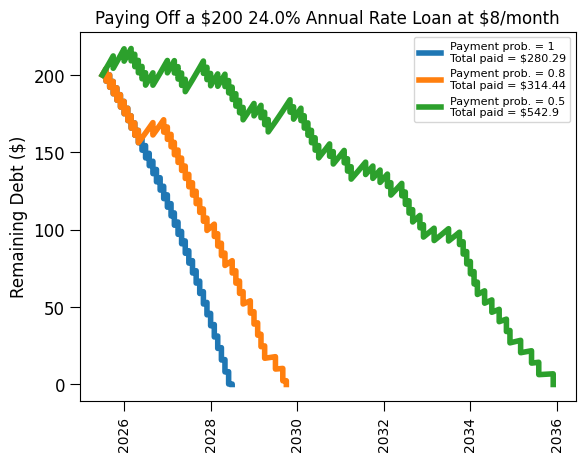

In [20]:
def test_missing(verbose = 0):
    """Looks at impact of multiple probabilities of missing payments
       Produces plots
    """
    start_date = date(2025, 7, 1)
    principal = 200
    annual_rate = 0.24 # 2%/month
    # Plan to pay off in slighly more than 2 years
    payment_amt = round(principal/24)
    
    title = f'Loan of ${principal} with annual rate {100*annual_rate}%'
    for payment_prob in (1, 0.8, 0.5,):
        loan = Loan(principal=principal, annual_rate=annual_rate,
                        start_date=start_date, name = title)
        make_payments(loan, payment_amt, payment_prob)
        ledger = loan.get_ledger()
        if verbose > 0:
            print(ledger)
        label = (f'Payment prob. = {payment_prob}\n'
                f'Total paid = ${ledger.get_total_paid()}')
        if loan.get_balance() > 0:
            label += f'\nRemaining balance = {loan.get_balance()}'
        plt.plot(ledger.get_dates(), ledger.get_balances(),
                 label = label)
        plt.xticks(rotation = 90)
    plt.title(f'Paying Off a \${principal} {annual_rate*100}% Annual Rate '
              f'Loan at ${payment_amt}/month')
    plt.ylabel('Remaining Debt ($)')
    plt.legend()

test_missing()
    


### Multiple Trials Test

Runs the missed-payment simulation several times to show how **randomness** changes outcomes.  
Even with the same setup, different random sequences of missed payments can lead to very different repayment paths — from paying off the loan to spiraling debt.  


          Ledger for Loan of $200 with annual rate 24.0%

2025-07-01: Initial loan of $200, balance = 200
2025-08-01: Accrued interest of $4.08, balance = 204.08
2025-08-01: Payment of $8, balance = 196.08
2025-09-01: Accrued interest of $4.0, balance = 200.08
2025-09-01: Payment of $8, balance = 192.08
2025-10-01: Accrued interest of $3.79, balance = 195.87
2025-10-01: Payment of $8, balance = 187.87
2025-11-01: Accrued interest of $3.83, balance = 191.7
2025-11-01: Payment of $8, balance = 183.7
2025-12-01: Accrued interest of $3.62, balance = 187.32
2025-12-01: Payment of $8, balance = 179.32
2026-01-01: Accrued interest of $3.66, balance = 182.98
2026-01-01: Payment of $8, balance = 174.98
2026-02-01: Accrued interest of $3.57, balance = 178.55
2026-02-01: Payment of $8, balance = 170.55
2026-03-01: Accrued interest of $3.14, balance = 173.69
2026-03-01: Payment of $8, balance = 165.69
2026-04-01: Accrued interest of $3.38, balance = 169.07
2026-04-01: Payment of $8, balance = 161.

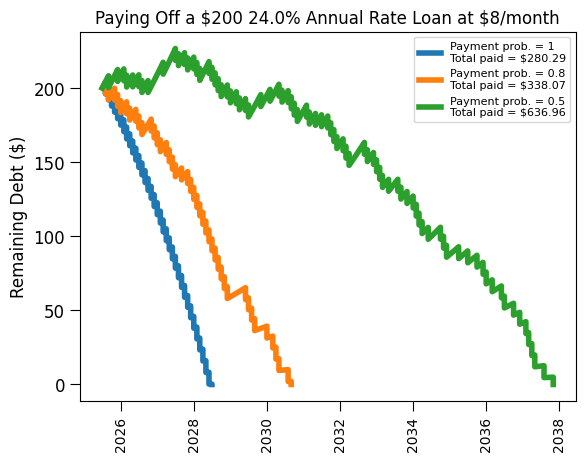

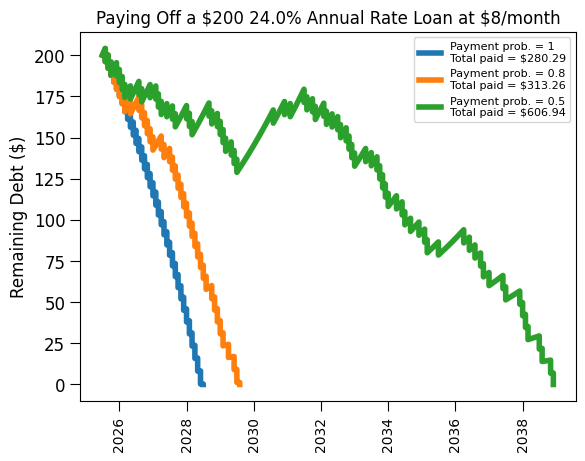

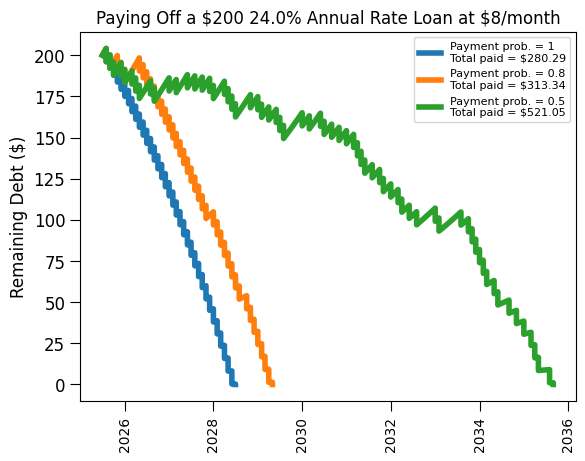

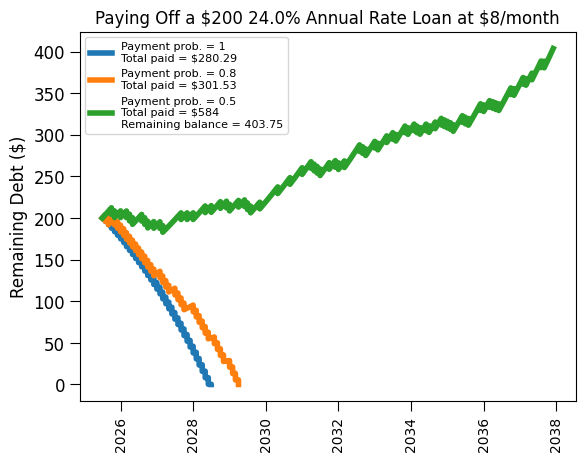

In [21]:
def try_multiple_trials(verbose = False):
    """Run multipe trials of test"""
    num_trials = 4
    random.seed(0)
    for t in range(num_trials):
        test_missing(verbose)
        if t < num_trials - 1:
            plt.figure()

try_multiple_trials(True)